In [71]:
import pandas as pd  
import matplotlib.pyplot as plt 
import numpy as np

In [72]:
data= pd.read_csv('./data/AMD_clustering_0.csv',delimiter=',',header=0)

In [73]:
data.describe()

,SS,ST,CH,ML,fC
count,3.820518e+06,3.820518e+06,3.820518e+06,3.820518e+06,3.820518e+06
mean,8.700462e-01,5.907391e-01,6.087800e-03,3.030535e-02,3.382603e-01
std,4.216187e-02,2.404876e-01,1.819702e-02,3.631893e-02,5.894563e-02
min,5.325000e-03,5.600000e-05,1.170000e-04,0.000000e+00,1.493900e-02
25%,8.472500e-01,4.424440e-01,9.870000e-04,1.137500e-02,3.099800e-01
50%,8.757500e-01,6.363610e-01,1.811000e-03,2.085100e-02,3.348090e-01
75%,8.981500e-01,7.950280e-01,4.808000e-03,3.562600e-02,3.639340e-01
max,9.869750e-01,9.830560e-01,9.885480e-01,9.969790e-01,9.995610e-01


In [74]:
print(data.shape)
data = data.dropna()
print(data.shape)

(3820518, 5)
(3820518, 5)


In [75]:
import numpy as np
import pandas as pd
import scipy as stats
from scipy.stats import chi2 

def calculateMahalanobis(y=None, data=None, cov=None):
    y_mu = y - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left = np.dot(y_mu, inv_covmat)
    mahal = np.dot(left, y_mu.T)
    return mahal.diagonal()

In [81]:
datos = data.sample(frac=0.005, random_state=1234)
datos.shape

(19103, 5)

In [82]:
print(datos.head(5))

               SS        ST        CH        ML        fC
1266732  0.931800  0.678889  0.001312  0.006774  0.392398
2720381  0.879500  0.476389  0.002879  0.031849  0.318968
3135068  0.877900  0.520389  0.004365  0.028887  0.315623
762183   0.886275  0.865250  0.000472  0.030180  0.325348
183561   0.846200  0.065306  0.004350  0.020766  0.265953


In [83]:
datos['Mahalanobis'] = calculateMahalanobis(y=datos, data=datos)

datos['p'] = 1 - chi2.cdf(datos['Mahalanobis'], 3)

In [84]:
print(datos.shape)
sinoutliers = datos[datos['p'] > 0.001]  
print(sinoutliers.shape)

(19103, 7)
(18342, 7)


In [85]:
datos2 = sinoutliers[['SS', 'ST', 'CH', 'ML', 'fC']].copy()

In [86]:
datos2 = (datos2 - datos2.min())/(datos2.max()-datos2.min())

In [87]:
from sklearn import datasets
import seaborn as sb 
from sklearn.cluster import KMeans

sse = []
for k in range(1, 11):
    kmeans = KMeans(init="random", n_clusters=k, n_init=10, max_iter=200)
    kmeans.fit(datos2)
    sse.append(kmeans.inertia_)

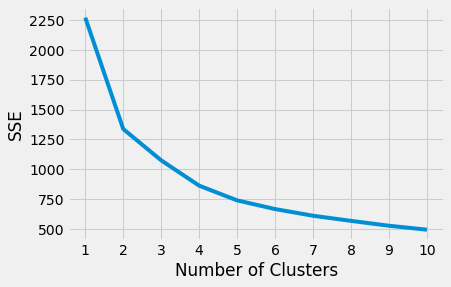

In [88]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [89]:
from kneed import KneeLocator

kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

ncentroides = kl.elbow
print(ncentroides)

4


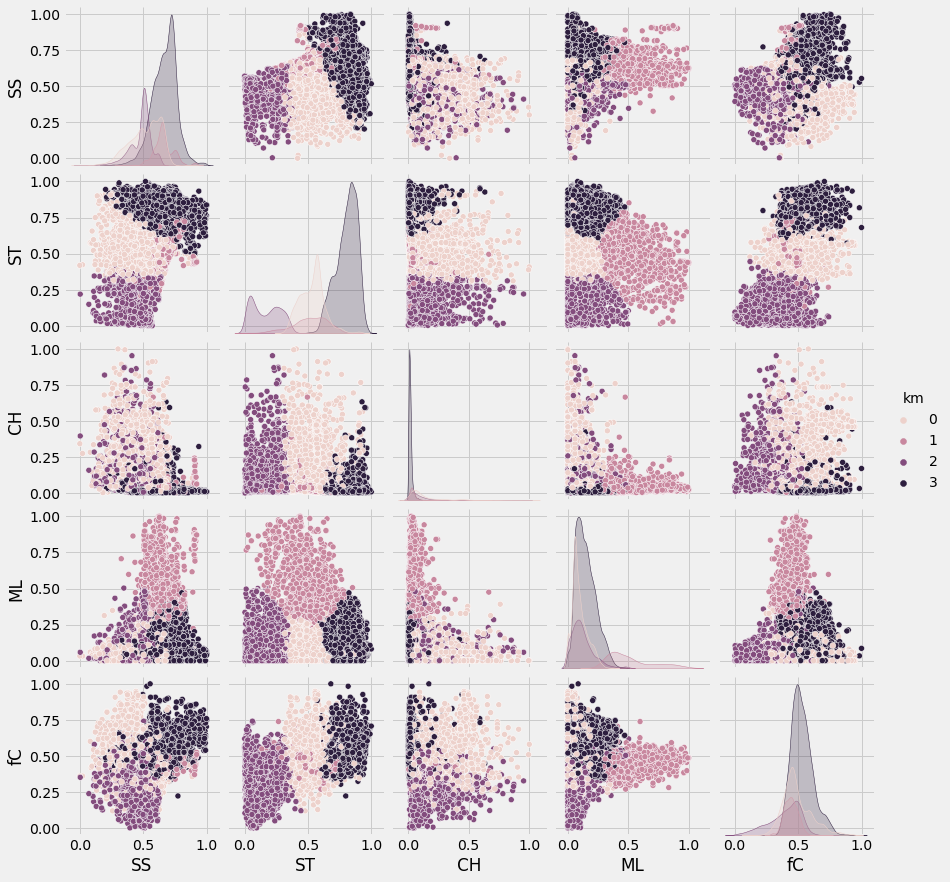

In [90]:
model = KMeans(init="random", n_clusters=ncentroides, n_init=10, max_iter=200)
datos2['km'] = model.fit_predict(datos2)
sb.pairplot(datos2, hue='km')